# Importing Libraries

In [2]:
!pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [17]:
import keras
import tensorflow as tf 
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras import layers
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from keras.layers import Concatenate, Conv2D, MaxPooling2D, Flatten, Dense, Input,BatchNormalization
from keras.models import Model
from sklearn.model_selection import train_test_split

# Loading Dataset and Preprocessing

In [4]:
# Load the CIFAR10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

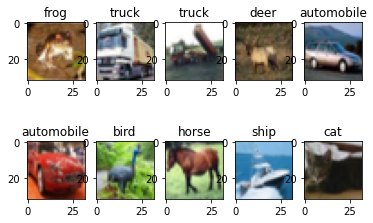

In [5]:
def plot_classes():    
    classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
    fig, ax = plt.subplots(nrows=2, ncols=5)
    index = 0
    for row in ax:
        for col in row:
            col.imshow(x_train[index])
            col.title.set_text(classes[y_train[index][0]])
            index += 1
    plt.show()

plot_classes()

In [6]:
# Preprocessing 
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255


In [7]:
x_train_split, x_val_split, y_train_split, y_val_split = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

In [8]:
# Convert class vectors to binary class matrices
num_classes = 10 
y_train_split = keras.utils.to_categorical(y_train_split, num_classes) 
y_val_split = keras.utils.to_categorical(y_val_split, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Normal CNN

In [13]:
with tf.device('/GPU:0'):
  input_tensor = Input(shape=(32, 32,3 ))
  conv1 = Conv2D(32, kernel_size=(2,2), activation='relu')(input_tensor)
  BN1 = BatchNormalization()(conv1)
  conv2 = Conv2D(64, kernel_size=(2,2), activation='relu')(BN1)
  BN2 = BatchNormalization()(conv2)
  conv3 = Conv2D(64, kernel_size=(2,2), activation='relu')(BN2)
  BN3 = BatchNormalization()(conv3)
  conv4 = Conv2D(128, kernel_size=(2,2), activation='relu')(BN3)
  BN4 = BatchNormalization()(conv4)
  conv5 = Conv2D(64, kernel_size=(2,2), activation='relu')(BN4)
  BN5 = BatchNormalization()(conv5)
  conv6 = Conv2D(256, kernel_size=(2,2), activation='relu')(BN5)
  BN6 = BatchNormalization()(conv6)
  flatten = Flatten()(BN6)
  dense = Dense(128, activation='relu')(flatten)
  dense2= Dense(64, activation='relu')(dense)
  dense3=Dense(32, activation='relu')(dense2)
  output_tensor = Dense(10, activation='softmax')(dense3)
  model = Model(inputs=input_tensor, outputs=output_tensor)
  model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
  batch_size = 64
  epochs = 20
  callbacks = EarlyStopping(
    monitor="val_loss",
    patience=3,
    verbose=1,
    restore_best_weights=True
  )
  history = model.fit(x_train_split, y_train_split,validation_data=(x_val_split, y_val_split),batch_size=batch_size,epochs=epochs,verbose=1,callbacks = [callbacks])
  

Epoch 1/20
704/704 [==============================] - 29s 35ms/step - loss: 1.8226 - accuracy: 0.4228 - val_loss: 1.4534 - val_accuracy: 0.5040
Epoch 2/20
704/704 [==============================] - 25s 36ms/step - loss: 1.0663 - accuracy: 0.6310 - val_loss: 1.0952 - val_accuracy: 0.6356
Epoch 3/20
704/704 [==============================] - 23s 33ms/step - loss: 0.7484 - accuracy: 0.7404 - val_loss: 1.0726 - val_accuracy: 0.6398
Epoch 4/20
704/704 [==============================] - 22s 32ms/step - loss: 0.5020 - accuracy: 0.8294 - val_loss: 1.1705 - val_accuracy: 0.6532
Epoch 5/20
704/704 [==============================] - 24s 34ms/step - loss: 0.3218 - accuracy: 0.8935 - val_loss: 1.1715 - val_accuracy: 0.6686
Epoch 6/20
704/704 [==============================] - 24s 34ms/step - loss: 0.2190 - accuracy: 0.9284 - val_loss: 1.3273 - val_accuracy: 0.6630
Epoch 6: early stopping


In [36]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_18 (Conv2D)          (None, 31, 31, 32)        416       
                                                                 
 batch_normalization_18 (Bat  (None, 31, 31, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_19 (Conv2D)          (None, 30, 30, 64)        8256      
                                                                 
 batch_normalization_19 (Bat  (None, 30, 30, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_20 (Conv2D)          (None, 29, 29, 64)        1644

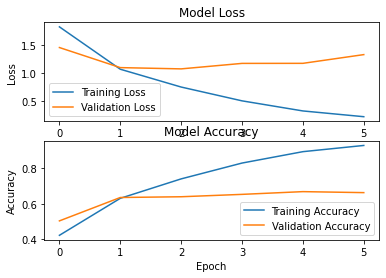

In [14]:
# Plot training and validation loss
plt.subplot(2, 1, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(2, 1, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# CNN with Addition of layers 

In [26]:
with tf.device('/GPU:0'):
  input_tensor = Input(shape=(32, 32,3 ))
  conv1 = Conv2D(8, kernel_size=(3,3), activation='relu',padding='same')(input_tensor)
  BN1 = BatchNormalization()(conv1)
  conv2 = Conv2D(32, kernel_size=(3,3), activation='relu',padding='same')(BN1)
  BN2 = BatchNormalization()(conv2)
  conv3 = Conv2D(64, kernel_size=(3,3), activation='relu',padding='same')(BN2)
  BN3 = BatchNormalization()(conv3)
  conv4 = Conv2D(128, kernel_size=(3,3), activation='relu',padding='same')(BN3)
  BN4 = BatchNormalization()(conv4)
  conv5 = Conv2D(32, kernel_size=(3,3), activation='relu',padding='same')(BN4)
  conv5= layers.Add()([conv2,conv5])
  BN5 = BatchNormalization()(conv5)
  conv6 = Conv2D(32, kernel_size=(3,3), activation='relu',padding='same')(BN5)
  BN6 = BatchNormalization()(conv6)
  flatten = Flatten()(BN6)
  dense = Dense(64, activation='relu')(flatten)
  dense2= Dense(32, activation='relu')(dense)
  dense3=Dense(32, activation='relu')(dense2)
  output_tensor = Dense(10, activation='softmax')(dense3)
  model2 = Model(inputs=input_tensor, outputs=output_tensor)
  
  model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
  
  batch_size = 32
  epochs = 20
  
  callbacks = EarlyStopping(
    monitor="val_loss",
    patience=3,
    verbose=1,
    restore_best_weights=True
  )

  history2 = model2.fit(x_train_split, y_train_split,validation_data=(x_val_split, y_val_split),batch_size=batch_size,epochs=epochs,verbose=1,callbacks = [callbacks])
  

Epoch 1/20
1407/1407 [==============================] - 27s 16ms/step - loss: 1.5193 - accuracy: 0.4551 - val_loss: 1.1903 - val_accuracy: 0.5722
Epoch 2/20
1407/1407 [==============================] - 19s 14ms/step - loss: 1.0148 - accuracy: 0.6457 - val_loss: 1.0828 - val_accuracy: 0.6348
Epoch 3/20
1407/1407 [==============================] - 20s 14ms/step - loss: 0.7977 - accuracy: 0.7232 - val_loss: 0.9447 - val_accuracy: 0.6742
Epoch 4/20
1407/1407 [==============================] - 20s 14ms/step - loss: 0.6321 - accuracy: 0.7837 - val_loss: 0.8537 - val_accuracy: 0.7118
Epoch 5/20
1407/1407 [==============================] - 20s 14ms/step - loss: 0.4729 - accuracy: 0.8364 - val_loss: 0.9068 - val_accuracy: 0.7190
Epoch 6/20
1407/1407 [==============================] - 19s 14ms/step - loss: 0.3321 - accuracy: 0.8872 - val_loss: 0.9663 - val_accuracy: 0.7170
Epoch 7/20
1407/1407 [==============================] - 20s 14ms/step - loss: 0.2341 - accuracy: 0.9207 - val_loss: 1.0801 -

In [35]:
model2.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_14 (InputLayer)          [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_72 (Conv2D)             (None, 32, 32, 8)    224         ['input_14[0][0]']               
                                                                                                  
 batch_normalization_66 (BatchN  (None, 32, 32, 8)   32          ['conv2d_72[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 conv2d_73 (Conv2D)             (None, 32, 32, 32)   2336        ['batch_normalization_66[0]

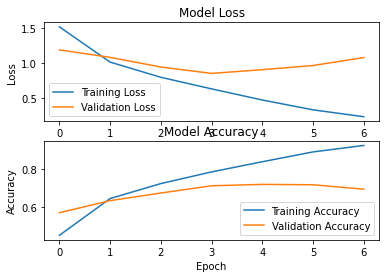

In [28]:
# Plot training and validation loss
plt.subplot(2, 1, 1)
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(2, 1, 2)
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# CNN with Concatenate of layers

In [32]:
with tf.device('/GPU:0'):
  input_tensor = Input(shape=(32, 32,3 ))
  conv1 = Conv2D(8, kernel_size=(3,3), activation='relu',padding='same')(input_tensor)
  conv12= layers.Concatenate()([input_tensor,conv1])
  BN1 = BatchNormalization()(conv12)
  conv2 = Conv2D(32, kernel_size=(3,3), activation='relu',padding='same')(BN1)
  BN2 = BatchNormalization()(conv2)
  conv3 = Conv2D(64, kernel_size=(3,3), activation='relu',padding='same')(BN2)
  conv32= layers.Concatenate()([BN1,conv3])
  BN3 = BatchNormalization()(conv32)
  conv4 = Conv2D(128, kernel_size=(3,3), activation='relu',padding='same')(BN3)
  BN4 = BatchNormalization()(conv4)
  conv5 = Conv2D(32, kernel_size=(3,3), activation='relu',padding='same')(BN4)
  conv5= layers.Concatenate()([conv2,conv5])
  BN5 = BatchNormalization()(conv5)
  conv6 = Conv2D(32, kernel_size=(3,3), activation='relu',padding='same')(BN5)
  conv62= layers.Concatenate()([BN4,conv6])
  BN6 = BatchNormalization()(conv62)
  flatten = Flatten()(BN6)
  dense = Dense(64, activation='relu')(flatten)
  dense2= Dense(64, activation='relu')(dense)
  dense3=Dense(32, activation='relu')(dense2)
  output_tensor = Dense(10, activation='softmax')(dense3)
  model3 = Model(inputs=input_tensor, outputs=output_tensor)
  
  model3.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
  
  batch_size = 32
  epochs = 20
  
  callbacks = EarlyStopping(
    monitor="val_loss",
    patience=3,
    verbose=1,
    restore_best_weights=True
  )

  history3 = model3.fit(x_train_split, y_train_split,validation_data=(x_val_split, y_val_split),batch_size=batch_size,epochs=epochs,verbose=1,callbacks = [callbacks])
  

Epoch 1/20
1407/1407 [==============================] - 63s 41ms/step - loss: 1.7388 - accuracy: 0.3465 - val_loss: 1.5334 - val_accuracy: 0.4416
Epoch 2/20
1407/1407 [==============================] - 27s 19ms/step - loss: 1.2582 - accuracy: 0.5371 - val_loss: 1.1671 - val_accuracy: 0.5706
Epoch 3/20
1407/1407 [==============================] - 27s 19ms/step - loss: 0.9726 - accuracy: 0.6474 - val_loss: 1.0450 - val_accuracy: 0.6232
Epoch 4/20
1407/1407 [==============================] - 29s 21ms/step - loss: 0.7660 - accuracy: 0.7247 - val_loss: 1.0488 - val_accuracy: 0.6518
Epoch 5/20
1407/1407 [==============================] - 30s 21ms/step - loss: 0.5598 - accuracy: 0.8062 - val_loss: 0.9294 - val_accuracy: 0.7038
Epoch 6/20
1407/1407 [==============================] - 29s 21ms/step - loss: 0.3805 - accuracy: 0.8693 - val_loss: 1.0616 - val_accuracy: 0.7004
Epoch 7/20
1407/1407 [==============================] - 30s 21ms/step - loss: 0.2615 - accuracy: 0.9123 - val_loss: 1.1610 -

In [34]:
model3.summary()

Model: "model_11"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_18 (InputLayer)          [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_96 (Conv2D)             (None, 32, 32, 8)    224         ['input_18[0][0]']               
                                                                                                  
 concatenate_21 (Concatenate)   (None, 32, 32, 11)   0           ['input_18[0][0]',               
                                                                  'conv2d_96[0][0]']              
                                                                                                  
 batch_normalization_90 (BatchN  (None, 32, 32, 11)  44          ['concatenate_21[0][0]']  

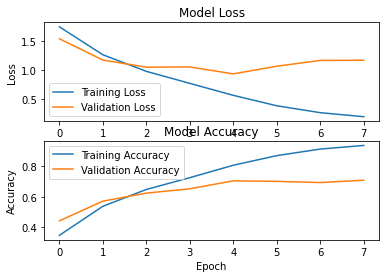

In [33]:
# Plot training and validation loss
plt.subplot(2, 1, 1)
plt.plot(history3.history['loss'], label='Training Loss')
plt.plot(history3.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(2, 1, 2)
plt.plot(history3.history['accuracy'], label='Training Accuracy')
plt.plot(history3.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()